In [11]:
import numpy as np
import matplotlib.pyplot as plt
import time, sys
sys.path.append('/Users/AbSir/Desktop/FlavaFlav')
from Orgdensity1 import density1
from Orgdensity2 import density2
from Orgmomentum import momentum1
sys.path.append('/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2')
from common_functions import jra_nprat
import warnings
from scipy.integrate import simps
from scipy.integrate import quad
from summary_dictionary import ryan_data, nadia_data
from scipy.interpolate import interp1d
import scipy.constants as const
from scipy.constants import physical_constants

mp = physical_constants['proton mass energy equivalent in MeV'][0] / 1000 # Proton mass in GeV

# Reading the 1 body density file

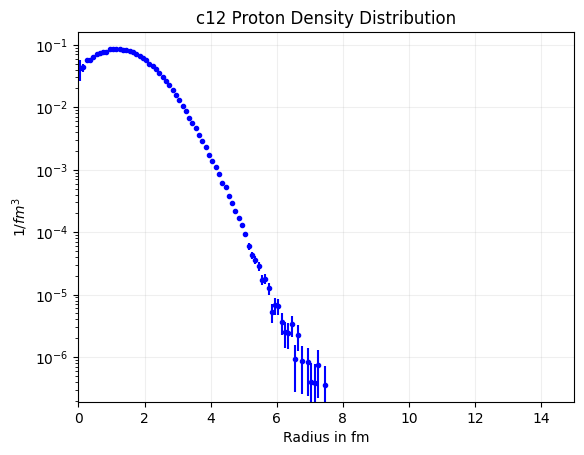

In [39]:
target = 'c12'
file_path = f'/Users/AbSir/Desktop/FlavaFlav/density/{target}.density'
R_list = []
RHORP_list = []
DRHORP_list = []
RHORN_list = []
DRHORN_list = []
warnings.filterwarnings('ignore')

def process_data(file_path):
    # Flag to indicate parsing should start
    start_parsing = False
    
    # Open the file for reading
    with open(file_path, 'r') as file:
        for line in file:
            # Check if the current line is the delimiter
            if '*****' in line:
                start_parsing = True
                continue  # Skip the delimiter line
            
            # Start processing lines after the delimiter
            if start_parsing:
                # Split the line into columns based on whitespace
                columns = line.split()
                
                # Check if the line has the expected columns
                if len(columns) == 5:
                    # Convert R and RHORP to float, and DRHORP to float (handling scientific notation)
                    try:
                        R, RHORP, DRHORP, RHORN, DRHORN = float(columns[0]), float(columns[1]), float(columns[2]), float(columns[3]), float(columns[4])
                        R_list.append(R)
                        RHORP_list.append(RHORP)
                        DRHORP_list.append(DRHORP)
                        RHORN_list.append(RHORN)
                        DRHORN_list.append(DRHORN)
                        # print(columns)
                    except:
                        start_parsing = False
                        break
                elif len(columns) == 3:
                    try:
                        R, RHORP, DRHORP = float(columns[0]), float(columns[1]), float(columns[2])
                        R_list.append(R)
                        RHORP_list.append(RHORP)
                        DRHORP_list.append(DRHORP)
                        RHORN_list.append(0)
                        DRHORN_list.append(0)
                    except:
                        start_parsing = False
                        break

    # Return the processed data
    # return R_array, RHORP_array, DRHORP_array, RHORN_array, DRHORN_array
    return R_list, RHORP_list, DRHORP_list, RHORN_list, DRHORN_list

R, RHORP, DRHORP, RHORN, DRHORN = process_data(file_path)

fig, ax = plt.subplots()
# Plot the data
ax.errorbar(R, RHORP, marker = 'o', yerr = DRHORP, color = 'b', markersize = 3, linestyle = 'None')
ax.set_xlabel('Radius in fm')
ax.set_ylabel(r'$1/fm^3$')
ax.set_yscale('log')
ax.set_xlim(0, 15)
ax.set_title(f'{target} Proton Density Distribution')
ax.grid(alpha = 0.2)
# fig.savefig(f'plots/{target}_density_{time.time():.0f}.pdf')

## Write data to dictionary density1

In [40]:
module_path = '/Users/AbSir/Desktop/FlavaFlav/Orgdensity1.py'

density1[f'{target}'] = R, RHORP, DRHORP, RHORN, DRHORN

with open(module_path, 'w') as f:
    f.write('density1 = ')
    f.write(str(density1))

print(density1[f'{target}'][0][2])

0.25


# Reading the 2 body density file

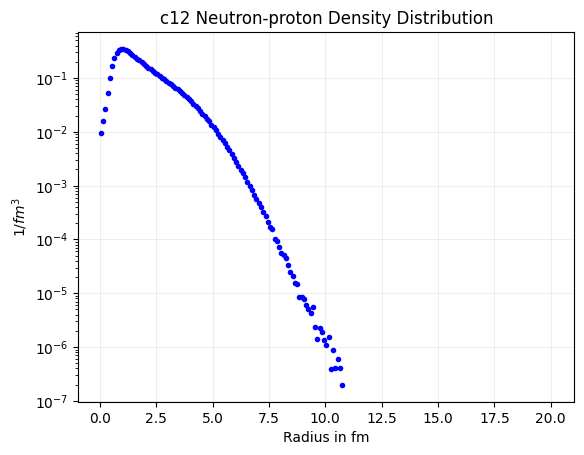

In [43]:
file_path = f'/Users/AbSir/Desktop/FlavaFlav/density2/{target}.density2'
RHORPP_list = []
RHORNP_list = []
RHORNN_list = []
R_list = []
DRHORPP_list = []
DRHORNP_list = []
DRHORNN_list = []

def process_tbd(file_path):
    # Flag to indicate parsing should start
    start_parsing = False
    
    # Open the file for reading
    with open(file_path, 'r') as file:
        for line in file:
            # Check if the current line is the delimiter
            if '*****' in line:
                start_parsing = True
                continue  # Skip the delimiter line
            
            # Start processing lines after the delimiter
            if start_parsing:
                # Split the line into columns based on whitespace
                columns = line.split()
                
                # Check if the line has the expected number of columns
                if len(columns) == 7:
                    # Convert R and RHORP to float, and DRHORP to float (handling scientific notation)
                    try:
                        R, RHORPP, DRHORPP, RHORNP, DRHORNP, RHORNN, DRHORNN = float(columns[0]), float(columns[1]), float(columns[2]), float(columns[3]), float(columns[4]), float(columns[5]), float(columns[6])
                        R_list.append(R)
                        RHORPP_list.append(RHORPP)
                        DRHORPP_list.append(DRHORPP)
                        RHORNP_list.append(RHORNP)
                        DRHORNP_list.append(DRHORNP)
                        RHORNN_list.append(RHORNN)
                        DRHORNN_list.append(DRHORNN)
                    except:
                        start_parsing = False
                        break
                elif len(columns) == 5:
                    try:
                        R, RHORPP, DRHORPP, RHORNP, DRHORNP = float(columns[0]), float(columns[1]), float(columns[2]), float(columns[3]), float(columns[4])
                        R_list.append(R)
                        RHORPP_list.append(RHORPP)
                        DRHORPP_list.append(DRHORPP)
                        RHORNP_list.append(RHORNP)
                        DRHORNP_list.append(DRHORNP)
                        RHORNN_list.append(0)
                        DRHORNN_list.append(0)
                    except:
                        start_parsing = False
                        break

    # Return the processed data
    return R_list, RHORPP_list, DRHORPP_list, RHORNP_list, DRHORNP_list, RHORNN_list, DRHORNN_list

R, RHORPP, DRHORPP, RHORNP, DRHORNP, RHORNN, DRHORNN = process_tbd(file_path)

tbd_r = np.array(R)
rhorpp_values = np.array(RHORPP)
rhorpn_values = np.array(RHORNP)
rhornn_values = np.array(RHORNN)

fig, ax = plt.subplots()
# Plot the data
ax.errorbar(R, RHORNP, marker = 'o', color = 'b', markersize = 3, linestyle = 'None')
ax.set_xlabel('Radius in fm')
ax.set_ylabel(r'$1/fm^3$')
ax.set_yscale('log')
# ax.set_xlim(0, 1.2)
ax.set_title(f'{target} Neutron-proton Density Distribution')
ax.grid(alpha = 0.2)
# fig.savefig(f'plots/{target}_2bodydensity_{time.time():.0f}.pdf')

## Write data to density2

In [44]:
module_path = '/Users/AbSir/Desktop/FlavaFlav/Orgdensity2.py'

# density2 = dict()
density2[f'{target}'] = R, RHORPP, DRHORPP, RHORNP, DRHORNP, RHORNN, DRHORNN

with open(module_path, 'w') as f:
    f.write('density2 = ')
    f.write(str(density2))

# Reading the momentum file

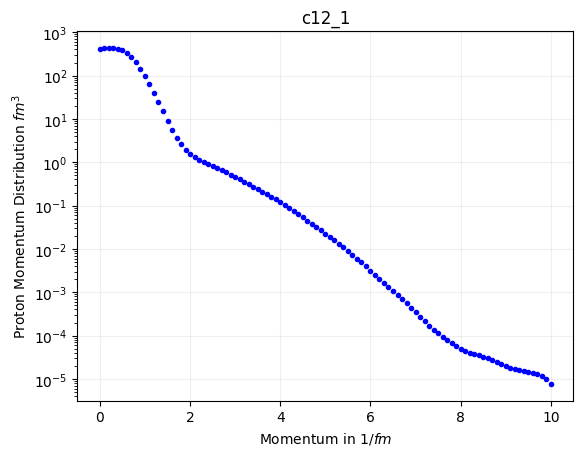

In [46]:
file_path = f'/Users/AbSir/Desktop/FlavaFlav/momentum/{target}.momentum'
K_list = []
RHOKN1_list = []
RHOKP1_list = []
DRHOKN1_list = []
DRHOKP1_list = []

def process_mom(file_path):
    # Flag to indicate parsing should start
    start_parsing = False
    
    # Open the file for reading
    with open(file_path, 'r') as file:
        for line in file:
            # Check if the current line is the delimiter
            if '*****' in line:
                start_parsing = True
                continue  # Skip the delimiter line
            
            # Start processing lines after the delimiter
            if start_parsing:
                # Split the line into columns based on whitespace
                columns = line.split()
                
                # Check if the line has the expected number of columns
                if len(columns) == 5:
                    # Convert R and RHORP to float, and DRHORP to float (handling scientific notation)
                    try:
                        K, RHOKN1, DRHOKN1, RHOKP1, DRHOKP1 = float(columns[0]), float(columns[1]), float(columns[2]), float(columns[3]), float(columns[4])
                        K_list.append(K)
                        RHOKN1_list.append(RHOKN1)
                        RHOKP1_list.append(RHOKP1)
                        DRHOKN1_list.append(DRHOKN1)
                        DRHOKP1_list.append(DRHOKP1)
                    except:
                        start_parsing = False
                        break
                if len(columns) == 3:
                    try:
                        K, RHOKP1, DRHOKP1 = float(columns[0]), float(columns[1]), float(columns[2])
                        K_list.append(K)
                        RHOKN1_list.append(0)
                        RHOKP1_list.append(RHOKP1)
                        DRHOKN1_list.append(0)
                        DRHOKP1_list.append(DRHOKP1)
                    except:
                        start_parsing = False
                        break

    # Return the processed data
    return K_list, RHOKN1_list, RHOKP1_list, DRHOKN1_list, DRHOKP1_list

K, RHOKN1, RHOKP1, DRHOKN1, DRHOKP1 = process_mom(file_path)

momentum = np.array(K)
rhokn1_values = np.array(RHOKN1)
rhokp1_values = np.array(RHOKP1)

fig, ax = plt.subplots()
# Plot the data
ax.errorbar(K, RHOKP1, marker = 'o', color = 'b', markersize = 3, linestyle = 'None')
ax.set_xlabel(r'Momentum in $1/fm$')
ax.set_ylabel(r'Proton Momentum Distribution $fm^3$')
ax.set_yscale('log')
ax.set_title(f'{target}_1')
ax.grid(alpha = 0.2)
# fig.savefig(f'plots/{target}_2bodydensity_{time.time():.0f}.pdf')

In [47]:
module_path = '/Users/AbSir/Desktop/FlavaFlav/Orgmomentum.py'

# momentum1 = dict()
momentum1[f'{target}'] = K, RHOKN1, RHOKP1, DRHOKN1, DRHOKP1

with open(module_path, 'w') as f:
    f.write('momentum1 = ')
    f.write(str(momentum1))

In [48]:
density1[f'{target}'][0]

[0.05,
 0.15,
 0.25,
 0.35,
 0.45,
 0.55,
 0.65,
 0.75,
 0.85,
 0.95,
 1.05,
 1.15,
 1.25,
 1.35,
 1.45,
 1.55,
 1.65,
 1.75,
 1.85,
 1.95,
 2.05,
 2.15,
 2.25,
 2.35,
 2.45,
 2.55,
 2.65,
 2.75,
 2.85,
 2.95,
 3.05,
 3.15,
 3.25,
 3.35,
 3.45,
 3.55,
 3.65,
 3.75,
 3.85,
 3.95,
 4.05,
 4.15,
 4.25,
 4.35,
 4.45,
 4.55,
 4.65,
 4.75,
 4.85,
 4.95,
 5.05,
 5.15,
 5.25,
 5.35,
 5.45,
 5.55,
 5.65,
 5.75,
 5.85,
 5.95,
 6.05,
 6.15,
 6.25,
 6.35,
 6.45,
 6.55,
 6.65,
 6.75,
 6.85,
 6.95,
 7.05,
 7.15,
 7.25,
 7.35,
 7.45,
 7.55,
 7.65,
 7.75,
 7.85,
 7.95,
 8.05,
 8.15,
 8.25,
 8.35,
 8.45,
 8.55,
 8.65,
 8.75,
 8.85,
 8.95,
 9.05,
 9.15,
 9.25,
 9.35,
 9.45,
 9.55,
 9.65,
 9.75,
 9.85,
 9.95,
 10.05,
 10.15,
 10.25,
 10.35,
 10.45,
 10.55,
 10.65,
 10.75,
 10.85,
 10.95,
 11.05,
 11.15,
 11.25,
 11.35,
 11.45,
 11.55,
 11.65,
 11.75,
 11.85,
 11.95,
 12.05,
 12.15,
 12.25,
 12.35,
 12.45,
 12.55,
 12.65,
 12.75,
 12.85,
 12.95,
 13.05,
 13.15,
 13.25,
 13.35,
 13.45,
 13.55,
 13.65,
 13.